<a href="https://colab.research.google.com/github/durg3sh10/Car_price_prediction_Linear_Regression/blob/main/Car_price_prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Data science/Alma Better/Machine learning/Projects/Linear Regression projects/Guided project data/Copy of CarPrice_project.csv')

In [ ]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


Now lets check the data types of our dependent and independent variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Exploratory Data Analysis


It is necessary to determine whether the data we are using has duplicated rows. We are going to identify duplicate rows and remove the duplicate rows.

In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(0, 26)


In [ ]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in df.columns if df[feature].isnull().sum()>1]
features_with_null_values

[]

Lets plot a histogram for the dependent variable

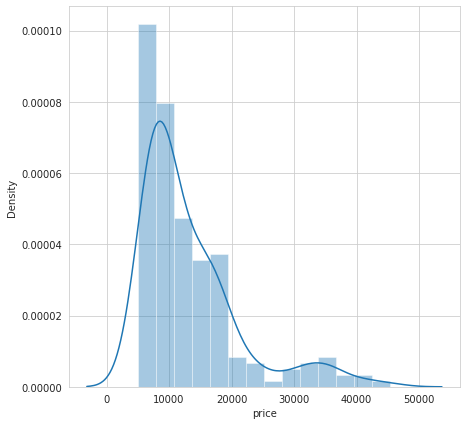

In [ ]:
# Dependent variable 'Price'
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.distplot(df['price']);

The graph is right skewed or positive-skew, that's because there is a long tail in the positive direction on the number line.

Common transformations of this data include square root, cube root, and log. Let us use log tranformation.


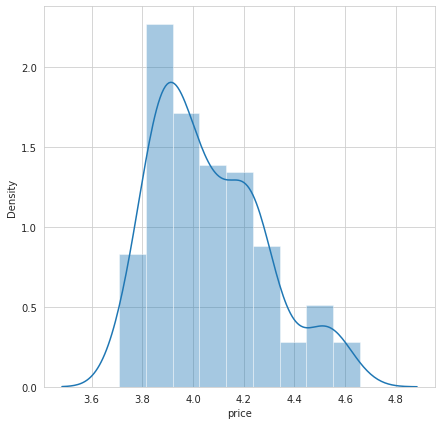

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['price']));

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Ploting a bar plot for each numerical feature count (except car_ID)

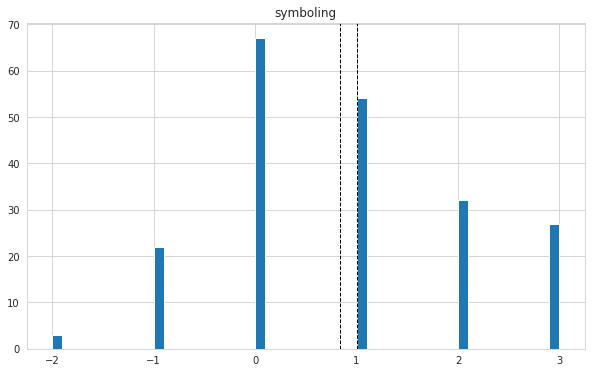

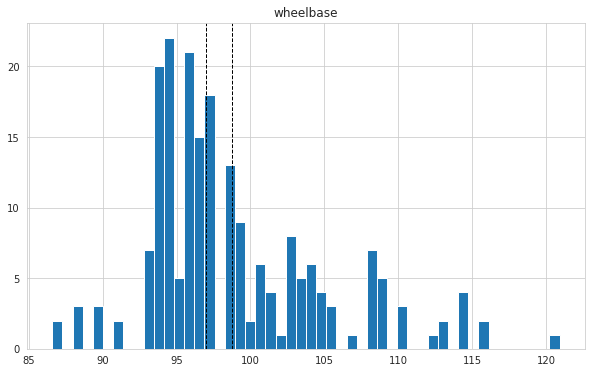

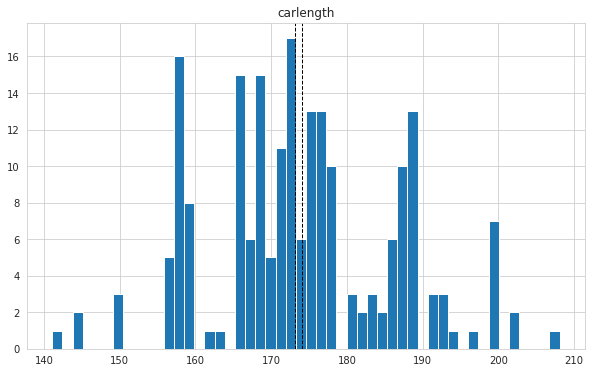

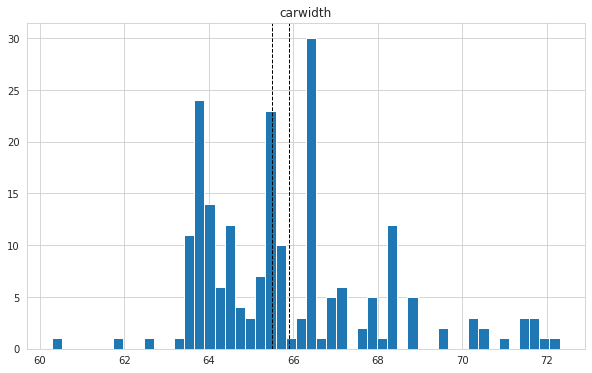

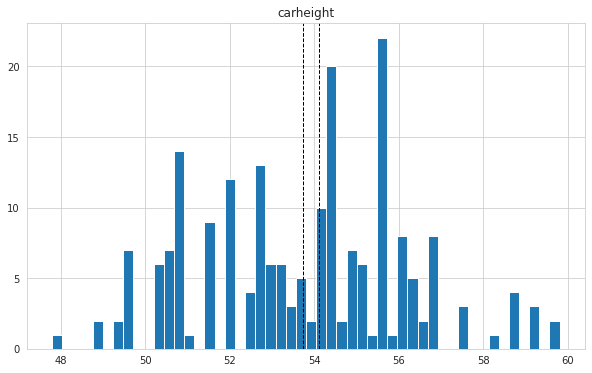

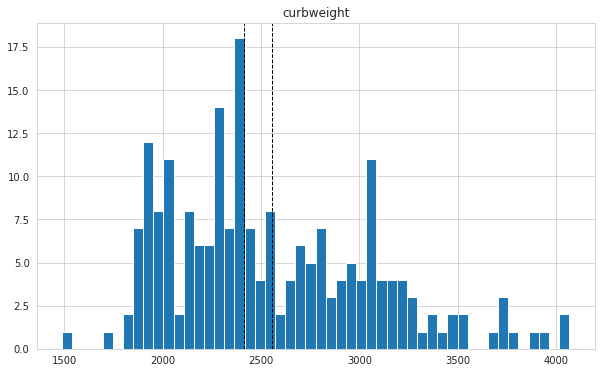

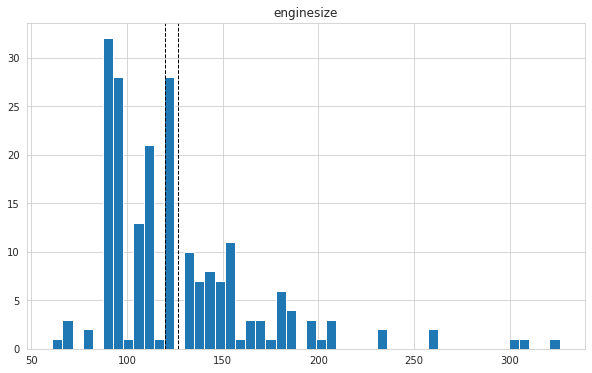

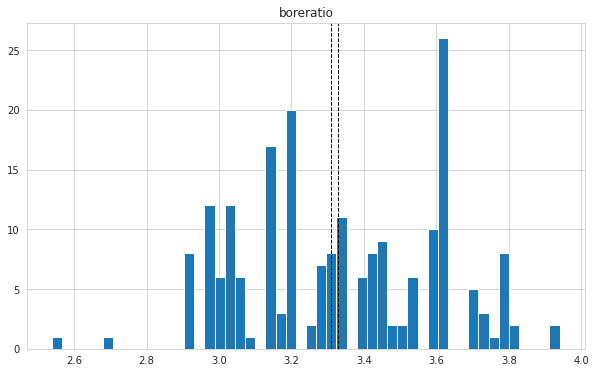

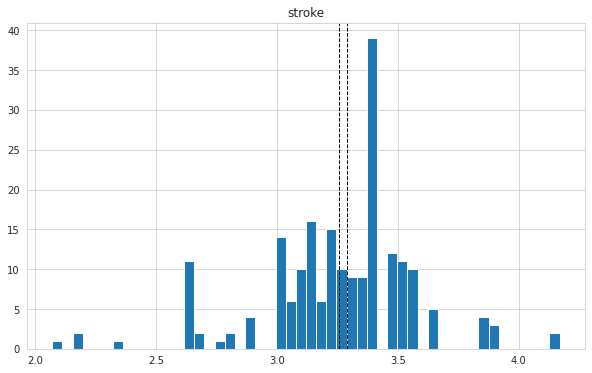

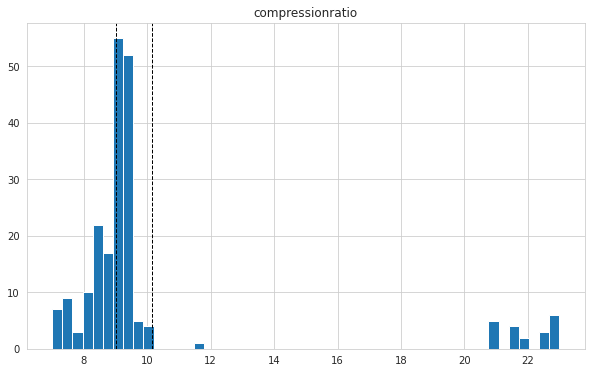

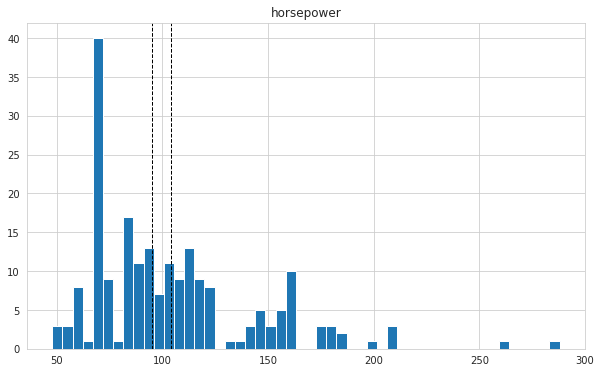

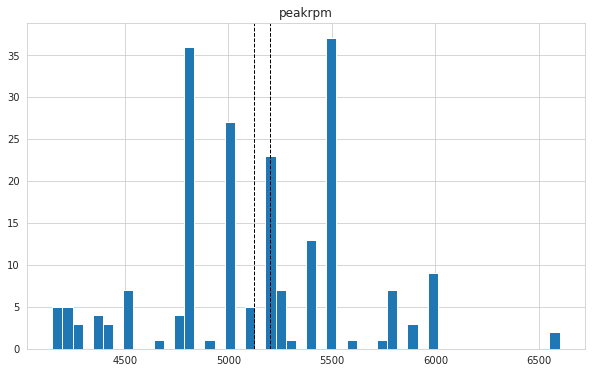

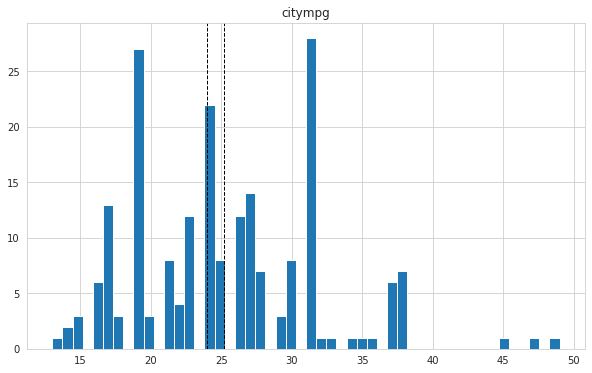

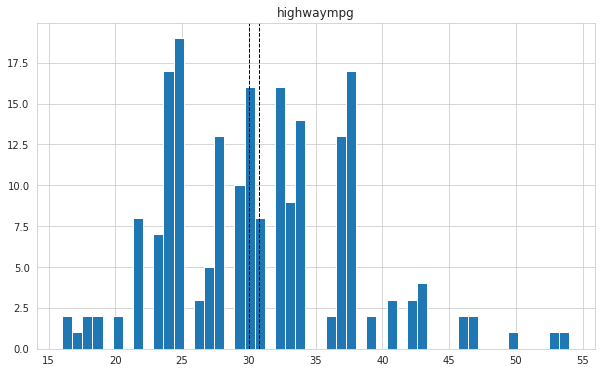

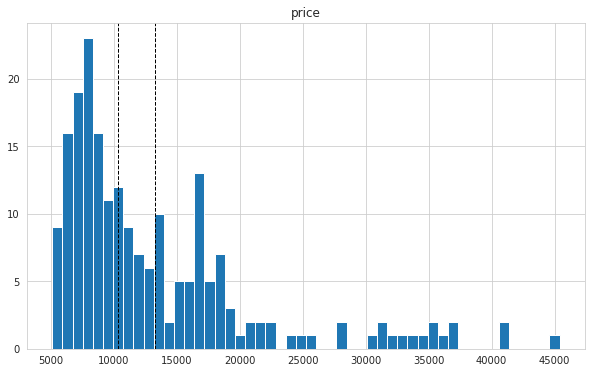

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    plt.axvline(feature.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(feature.median(), color='k', linestyle='dashed', linewidth=1)
    ax.set_title(col)

Plotting the graphs for independent and dependent variable

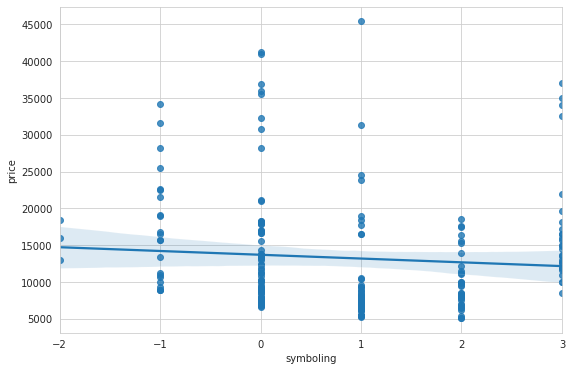

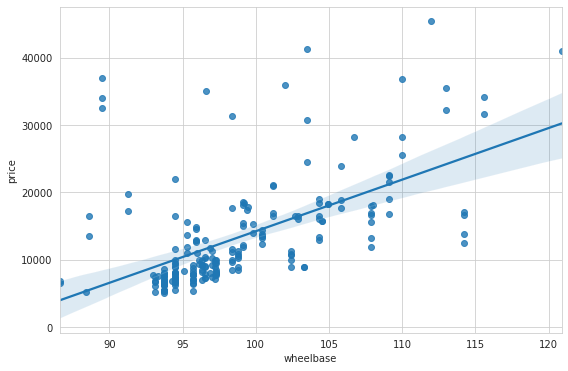

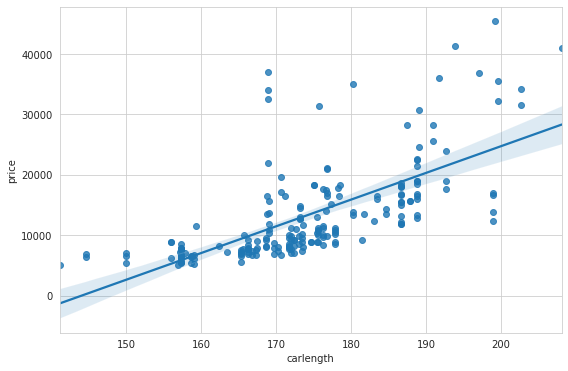

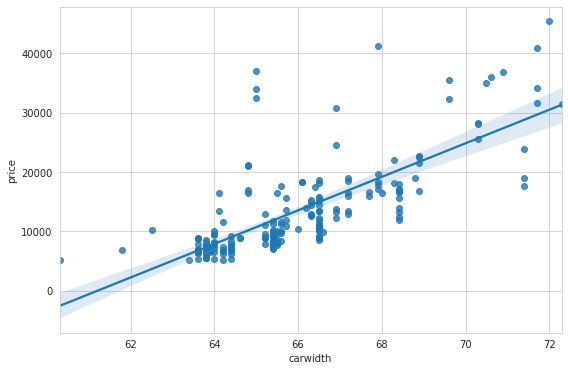

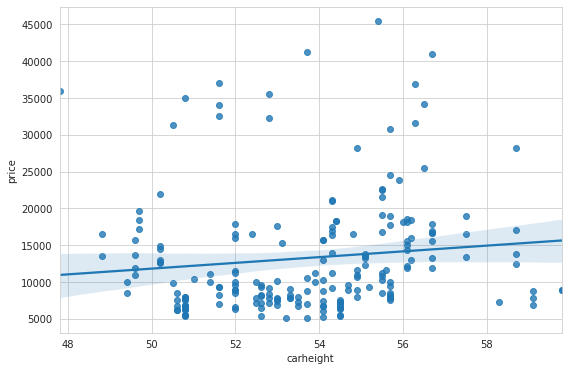

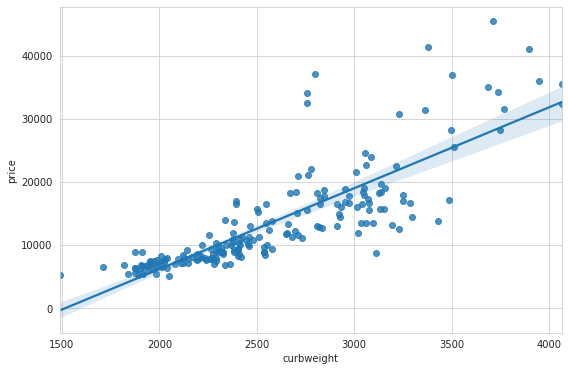

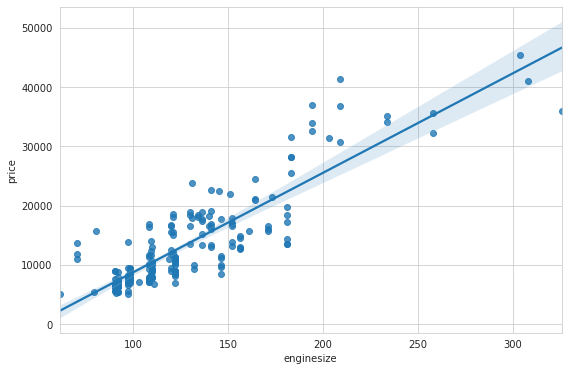

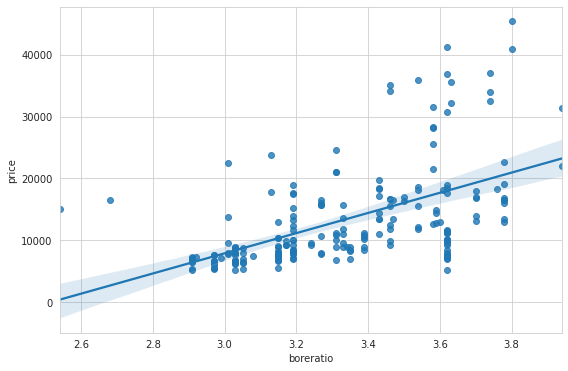

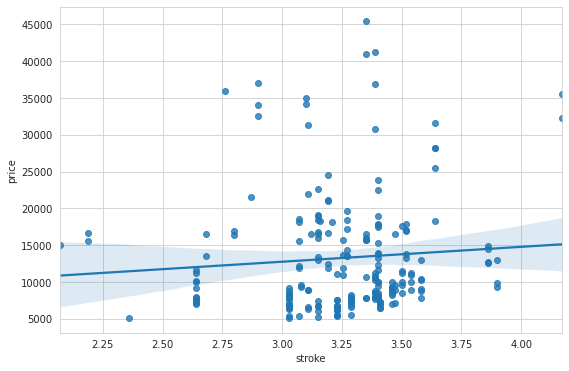

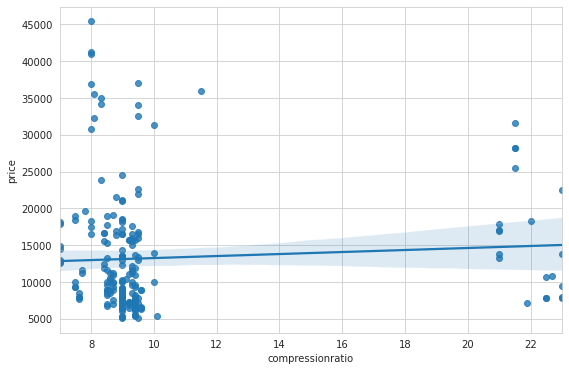

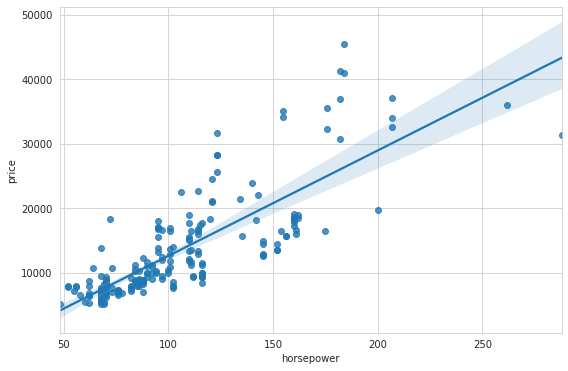

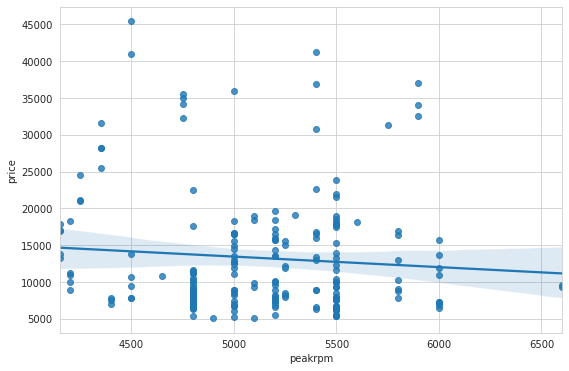

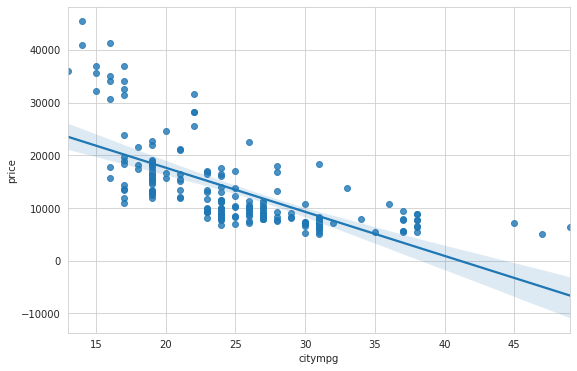

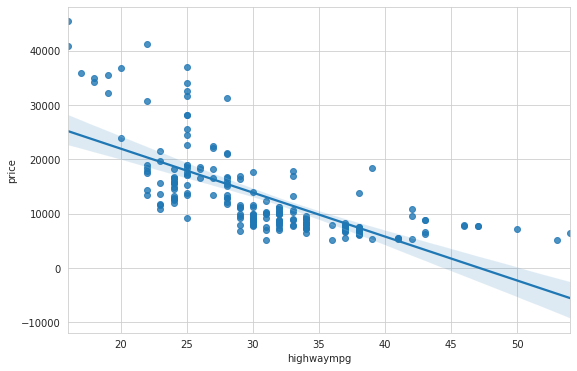

In [ ]:
for col in numeric_features[1:-1]:
  fig = plt.figure(figsize=(9, 6))
  sns.regplot(x=col, y = "price", data = df)
  ax.set_title('price vs ' + col + '- correlation: ');

Checking for independent variables that are highly correlated with target, so we only consider then while modelling

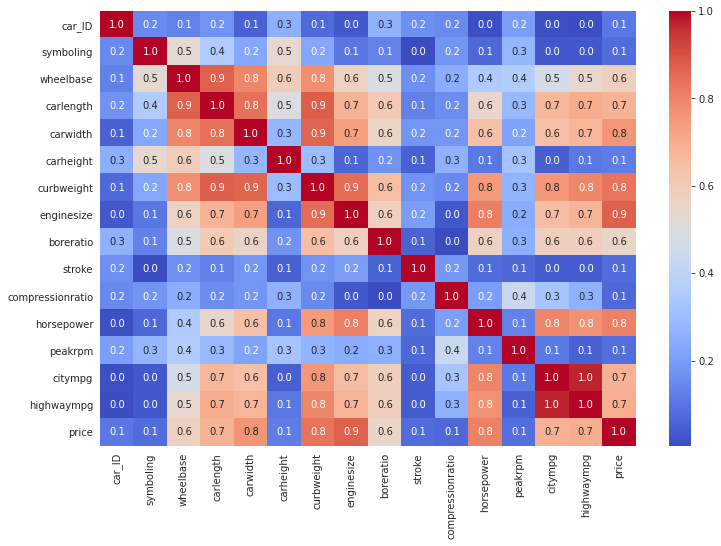

In [ ]:
fig, axes = plt.subplots(figsize=(12,8))
x = df.corr()
sns.heatmap(abs(x), cmap= 'coolwarm', fmt=".1f",annot= True);

Multicollinearity occurs when independent variables in a regression model are correlated.

 This correlation is a problem because independent variables should be independent. 
If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.


In [ ]:
### removing multicollear
df['mileage'] = 0.6*df['citympg'] + 0.4*df['highwaympg']
df['car_area'] = df['carlength']*df['carwidth']

In [ ]:
df.drop(["citympg","highwaympg","carlength","carwidth"], axis = 1, inplace = True)

Variance inflation factor(VIF) detects multicollinearity.

A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.

Between 1 and 5 = moderately correlated.

Greater than 5 = highly correlated.


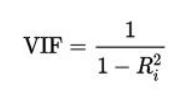

Where ${R^2}$ is another metric used for evaluating the performance of a regression model.

In [ ]:
 # Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.055617
1,wheelbase,1981.325782
2,carheight,825.908353
3,curbweight,406.251907
4,enginesize,67.262383
5,boreratio,261.276569
6,stroke,120.599905
7,compressionratio,15.829665
8,horsepower,58.898896
9,peakrpm,190.656419


Let's plot a Correlation heat map to get a picture of the degree of correlation between independent variables.

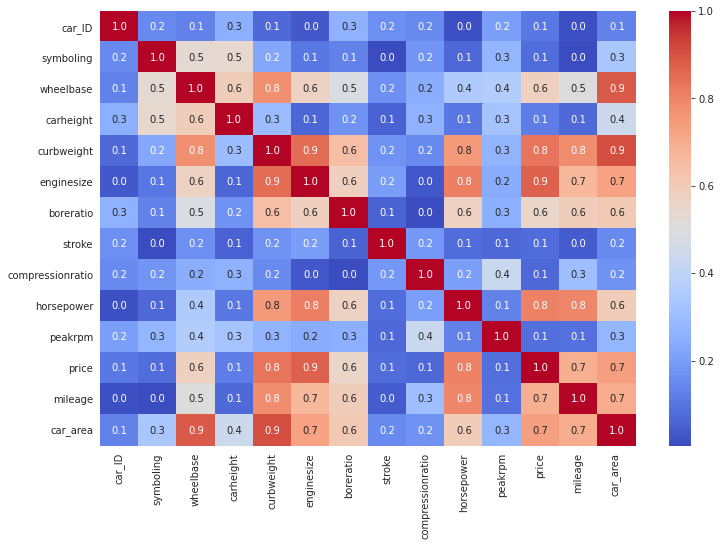

In [ ]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap= 'coolwarm', fmt=".1f",annot= True);

Remove some of the highly correlated independent variables.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price', 'company_cat', 'carwidth','carheight', 'car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [ ]:
numerical_features = ['enginesize','compressionratio','mileage']

Creating a company column for all the cars in our dataset.

There is a variable named 'CarName' which is comprised of two parts:

The first word is the name of 'car company' and the second is the 'car model'.

In [ ]:
df["company"] = df["CarName"].str.split(" ", expand=True)[0] 
df["company"] = df["company"].replace({ 'toyouta': 'Toyota', 'vw':'Volkswagen', 'vokswagen':'Volkswagen', 'maxda':'Mazda', 'porcshce':'Porsche'})

# To convert the first character in each word to Uppercase and remaining characters to Lowercase in the string and returns a new string
df["company"] = df["company"].str.title() 

In [ ]:
df["company"].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Plymouth        7
Audi            7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Jaguar          3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

<Figure size 1440x432 with 0 Axes>

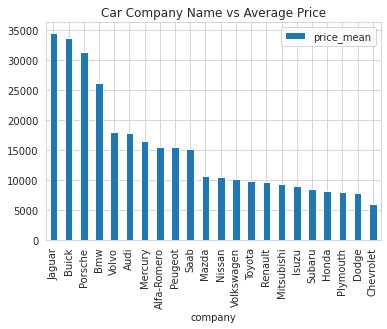

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.rename(columns={'price':'price_mean'},inplace=True)
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price');

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
for col in categorical_features:
  if col not in ['car_ID', "CarName"]:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'mileage', 'car_area', 'company'],
      dtype='object')

In [ ]:
df = df.merge(df_autox,on = 'company',how = 'left')
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mileage,car_area,company,price_mean
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,10820.08,Alfa-Romero,15498.333333
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4,10820.08,Alfa-Romero,15498.333333


In [ ]:
df['company_category'] = df['price_mean'].apply(lambda x : 0 if x < 12000 else 1)
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mileage,car_area,company,price_mean,company_category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1


In [ ]:
y = df.corr()
y.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
price               1.000000
mileage            -0.695484
car_area            0.738052
price_mean          0.895520
company_category    0.730893
Name: price, dtype: float64

In [ ]:
df1 = df.copy()

In [ ]:
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                               "aspiration":{"turbo":1,"std":0},
                              "doornumber":{"four": 4, "two": 2},
                              "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                              "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "twelve": 12, "three":3 }}

df1 = df1.replace(encoders_nums)

Categorical variables require special attention in regression analysis because, unlike dichotomous or continuous variables, they cannot by entered into the regression equation just as they are.  Instead, they need to be recoded into a series of variables which can then be entered into the regression model. 



In [ ]:
df1 = pd.get_dummies(df1, columns=["carbody", "enginetype","fuelsystem"])

In [ ]:
df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'mileage',
       'car_area', 'company', 'price_mean', 'company_category',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [ ]:
features = numerical_features.copy()
print(len(features))

features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_category','carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'])

3


Final features given to the train the model.

In [ ]:
print(len(features))
features

29


['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_category',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [ ]:
df2 = df1[features]
df2.head(2)

,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_category,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,130,9.0,23.4,0,0,2,1,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,130,9.0,23.4,0,0,2,1,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Divide data into independent variables('x'), Dependent variable('y') based on the problem statement.

In [ ]:
x = df2.values
y = np.log10(df['price']).values

####Train - Test Split :
Separating data into training and testing sets is an important part of evaluating data mining models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(41, 29)
(164, 29)
(41,)
(164,)


#Linear Regression

####Scaling :
Why scaling ? It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regression  =  LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(len(regression.coef_))
regression.coef_

29


array([ 8.35674756e-02, -5.00309123e-02, -4.75209097e-02,  3.38635204e-02,
        1.65450388e-02,  1.42439965e-02,  1.68458325e-02,  1.96588625e-02,
        5.68847701e-02,  1.49750590e-02,  3.25403450e-03, -2.46755723e-03,
        9.45280224e-04, -7.86097149e-03, -4.95665266e-03,  2.77555756e-17,
       -2.20281274e-02,  6.62869563e-03,  8.95634397e-03, -1.51207116e-02,
        3.31884457e-02, -2.16495978e-03, -2.32333085e-02, -5.48084175e-03,
        3.38635204e-02, -3.30425975e-03,  7.66048170e-03, -1.20879105e-02,
        2.41477151e-03])

In [ ]:
regression.intercept_

4.065922653243945

In [ ]:
y_pred = regression.predict(x_test)

In [ ]:
y_test

array([3.83218946, 4.19728056, 4.18326984, 3.71189155, 3.9997828 ,
       4.04917924, 3.73150818, 3.89751713, 4.2355032 , 3.81484667,
       4.32159843, 4.49693656, 4.03921577, 4.26349404, 3.95019441,
       3.99952201, 3.96824939, 4.27692113, 3.89735213, 3.81211084,
       3.99821573, 4.19256745, 3.9954158 , 4.06254438, 4.20406569,
       3.70910028, 3.8412343 , 4.22258642, 3.92210237, 3.74028372,
       3.90173069, 4.08955188, 4.34277787, 3.95172598, 3.83562717,
       4.61610776, 4.06427075, 4.25887663, 3.80461642, 4.65705585,
       3.95019441])

In [ ]:
y_pred

array([3.81632622, 4.15994335, 4.21641278, 3.50601254, 3.98213386,
       4.1012826 , 3.77877659, 3.86324581, 4.15143704, 3.87219988,
       4.30342203, 4.4035158 , 4.1042543 , 4.08171756, 3.79860731,
       4.07861935, 4.03369245, 4.21916053, 3.92718537, 3.84756238,
       3.96465965, 4.1220451 , 4.02372327, 4.07861935, 4.16916608,
       3.85165841, 3.87427348, 4.09559265, 3.88450927, 3.83400185,
       3.9544282 , 3.97463316, 4.23864367, 4.00487076, 3.86320204,
       4.44599732, 4.07311919, 4.15532083, 3.80961909, 4.64272827,
       3.76940712])

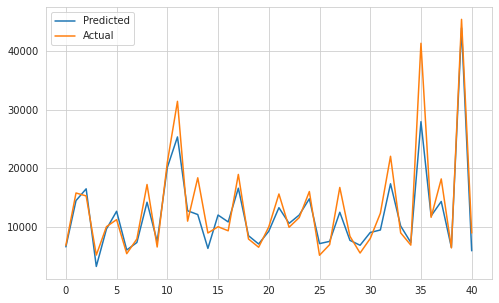

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"]);

#Regression Model Evaluation Metrics
After the model is built, if we see that the difference in the values of the
predicted and actual data is not much, it is considered to be a good
model and can be used to make future predictions.

Few metric tools we can use to calculate error in the model

1. MSE (Mean Squared Error)
2. RMSE (Root Mean Squared Error)
5. ${R^2}$ (R – Squared)

In [ ]:
#Mean Squared Error (MSE)
mean_squared_error(10**y_pred, 10**y_test, squared= True)

In [ ]:
#Root Mean Squared Error (RMSE)
mean_squared_error(10**y_pred, 10**y_test, squared= False)

3085.7060829713896

In [ ]:
#R2  (R – Squared)
r2_score(y_test, y_pred)

0.8611876437335165